In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_excel('cars_train.xlsx')
df.head()

,symboling,normalized.losses,make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,...,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,Car_Price
0,1,129.0,mazda,gas,std,two,hatchback,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,10595.0
1,1,125.0,mitsubishi,gas,std,four,sedan,fwd,front,96.3,...,122,2bbl,3.35,3.46,8.5,88.0,5000.0,25,32,8189.0
2,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645.0
3,3,194.0,nissan,gas,std,NaN,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,9.0,160.0,5200.0,19,25,17199.0
4,0,85.0,honda,gas,std,four,sedan,fwd,front,96.5,...,110,mpfi,3.15,3.58,9.0,101.0,5800.0,24,28,12945.0


# EDA

In [17]:
df.isna().sum()

symboling             0
normalized.losses    30
make                  0
fuel.type             0
aspiration            0
num.of.doors         11
body.style            0
drive.wheels          0
engine.location       2
wheel.base            0
length                0
width                 0
height                0
curb.weight           0
engine.type           0
num.of.cylinders      2
engine.size           0
fuel.system           0
bore                  3
stroke                3
compression.ratio     0
horsepower            4
peak.rpm              4
city.mpg              0
highway.mpg           0
Car_Price             3
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          162 non-null    int64  
 1   normalized.losses  132 non-null    float64
 2   make               162 non-null    object 
 3   fuel.type          162 non-null    object 
 4   aspiration         162 non-null    object 
 5   num.of.doors       151 non-null    object 
 6   body.style         162 non-null    object 
 7   drive.wheels       162 non-null    object 
 8   engine.location    160 non-null    object 
 9   wheel.base         162 non-null    float64
 10  length             162 non-null    float64
 11  width              162 non-null    float64
 12  height             162 non-null    float64
 13  curb.weight        162 non-null    int64  
 14  engine.type        162 non-null    object 
 15  num.of.cylinders   160 non-null    object 
 16  engine.size        162 non

In [19]:
df.dtypes

symboling              int64
normalized.losses    float64
make                  object
fuel.type             object
aspiration            object
num.of.doors          object
body.style            object
drive.wheels          object
engine.location       object
wheel.base           float64
length               float64
width                float64
height               float64
curb.weight            int64
engine.type           object
num.of.cylinders      object
engine.size            int64
fuel.system           object
bore                 float64
stroke               float64
compression.ratio    float64
horsepower           float64
peak.rpm             float64
city.mpg               int64
highway.mpg            int64
Car_Price            float64
dtype: object

In [20]:
df.shape

(162, 26)

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['stroke'] = le.fit_transform(df['stroke'])
df

,symboling,normalized.losses,make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,...,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,Car_Price
0,1,129.0,mazda,gas,std,two,hatchback,fwd,front,98.8,...,122,2bbl,3.39,22,8.6,84.0,4800.0,26,32,10595.0
1,1,125.0,mitsubishi,gas,std,four,sedan,fwd,front,96.3,...,122,2bbl,3.35,25,8.5,88.0,5000.0,25,32,8189.0
2,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,35,9.4,101.0,6000.0,17,23,13645.0
3,3,194.0,nissan,gas,std,NaN,hatchback,rwd,front,91.3,...,181,mpfi,3.43,19,9.0,160.0,5200.0,19,25,17199.0
4,0,85.0,honda,gas,std,four,sedan,fwd,front,96.5,...,110,mpfi,3.15,30,9.0,101.0,5800.0,24,28,12945.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,0,NaN,peugot,gas,std,four,wagon,rwd,front,114.2,...,120,mpfi,3.46,1,8.4,95.0,5000.0,19,24,16695.0
158,3,145.0,dodge,gas,turbo,two,hatchback,fwd,front,95.9,...,156,mfi,3.60,33,7.0,145.0,5000.0,19,24,12964.0
159,3,194.0,nissan,gas,std,NaN,hatchback,rwd,front,91.3,...,181,mpfi,3.43,19,9.0,160.0,5200.0,19,25,17199.0
160,0,85.0,honda,gas,std,four,sedan,fwd,front,96.5,...,110,mpfi,3.15,30,9.0,101.0,5800.0,24,28,12945.0


In [22]:
df['stroke'].unique()

array([22, 25, 35, 19, 30,  3, 33, 13, 10, 31, 23, 14, 24, 21,  9, 18,  1,
       27, 26,  6, 32, 20,  5, 17, 29, 28,  4,  8, 15, 12, 11,  0, 16,  2,
       34,  7], dtype=int64)

<Axes: ylabel='count'>

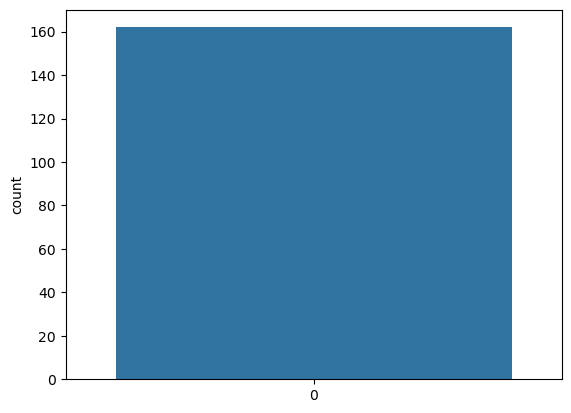

In [23]:
sns.countplot(df['stroke'])

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


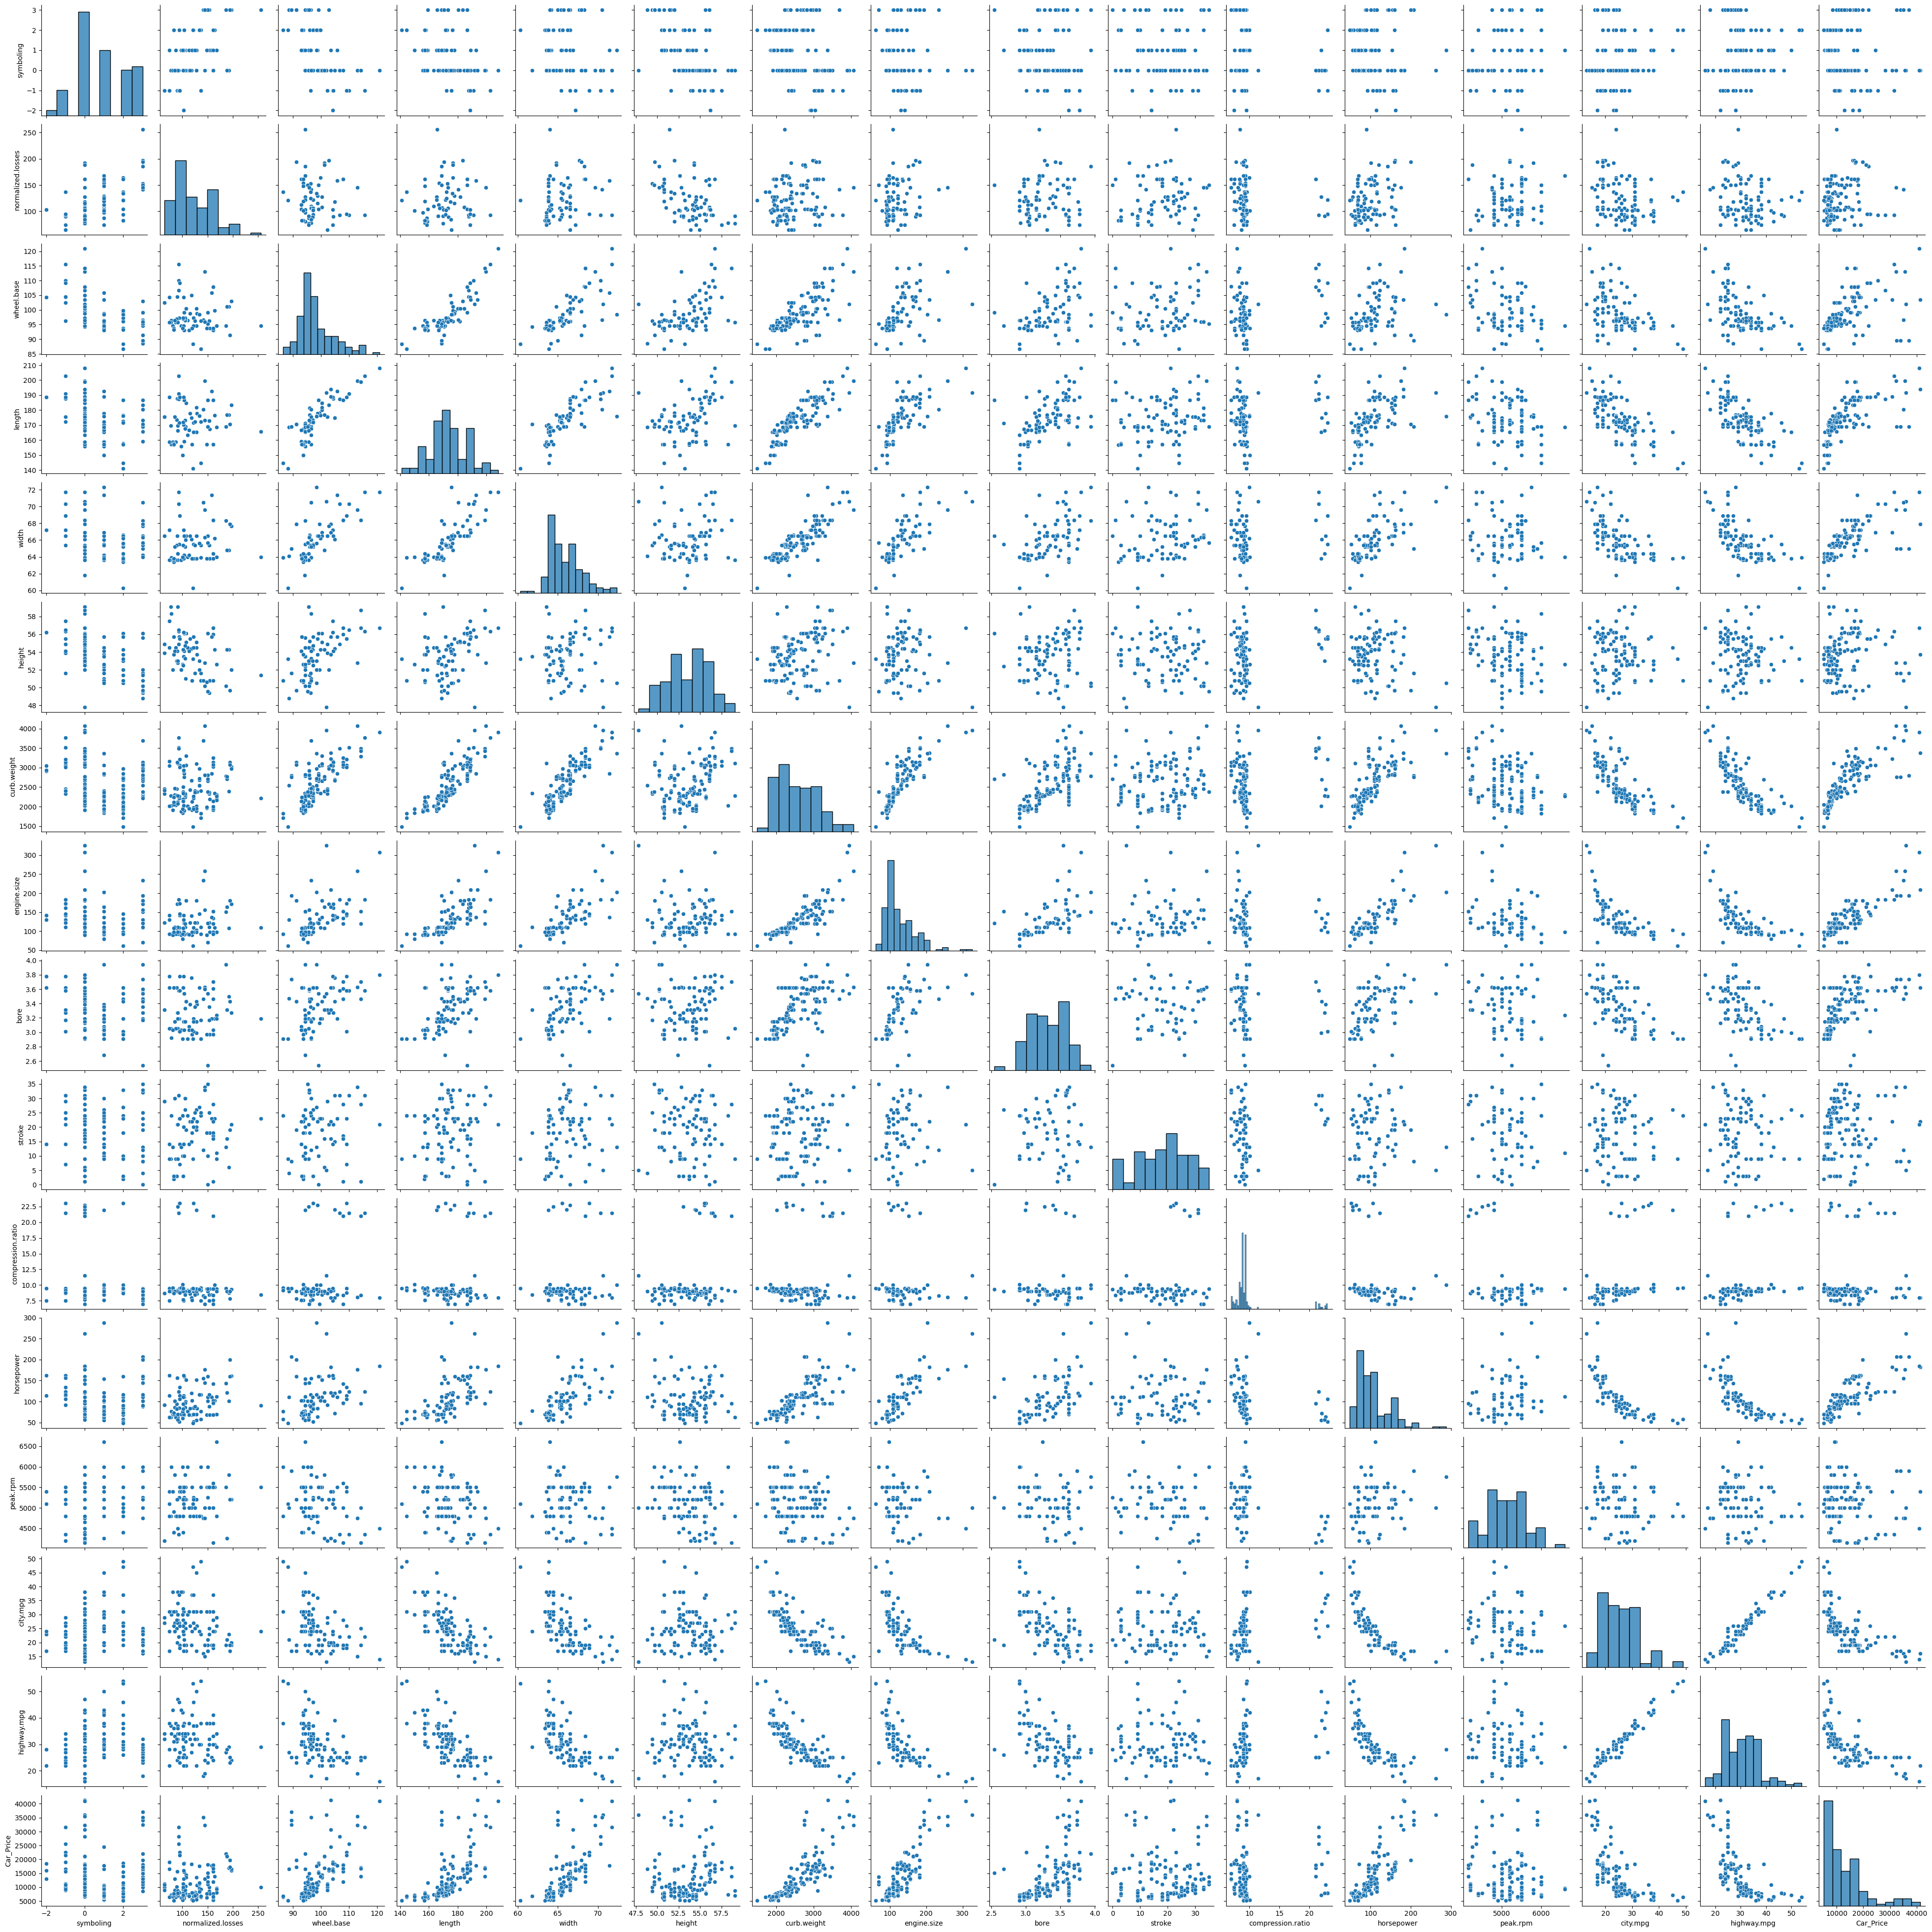

In [24]:
sns.pairplot(df)

In [25]:
fig=plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

ValueError: could not convert string to float: 'mazda'

<Figure size 1200x600 with 0 Axes>

<Axes: >

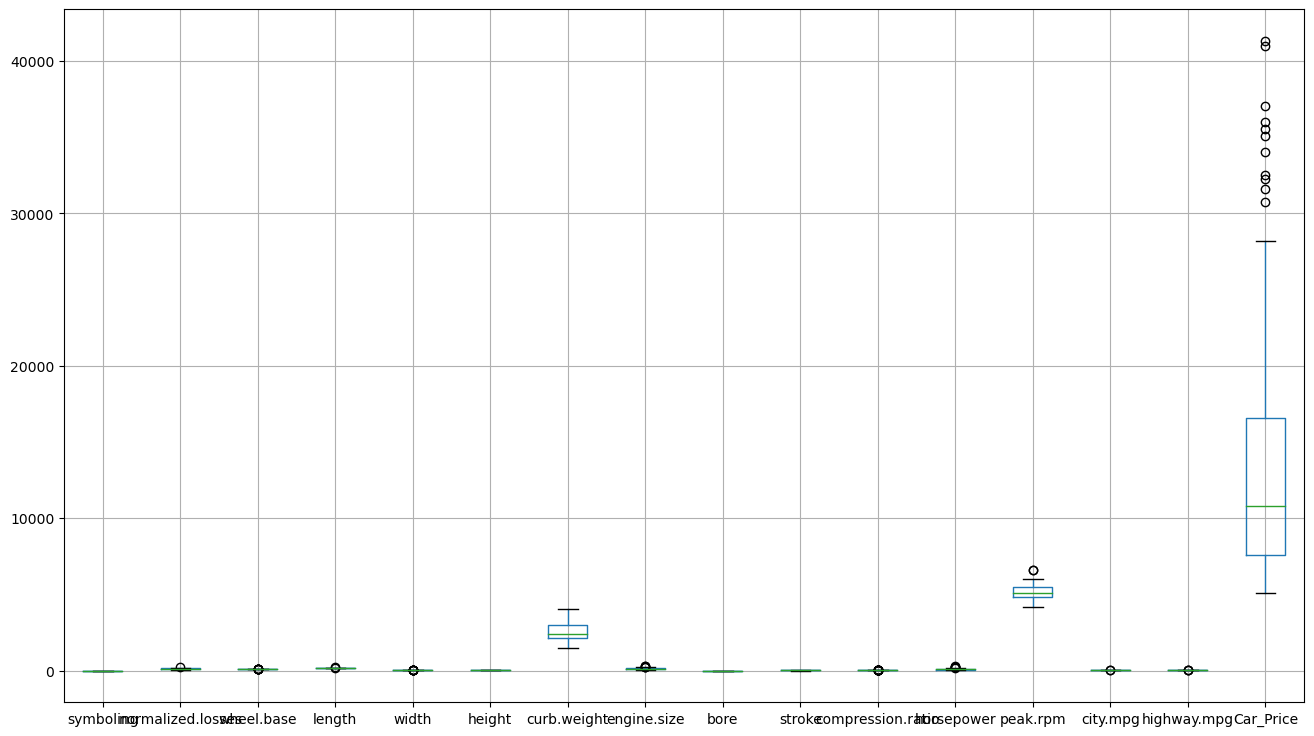

In [26]:
df.boxplot(figsize=(16,9))

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [29]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1:].values
print('X shape:\t',x.shape)
print()
print('Y shape:\t',y.shape)

X shape:	 (162, 25)

Y shape:	 (162, 1)


In [30]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25,random_state=2)
print('****************Training Data Shape********************\n')
print('Training data-X- Shape:\t',xtrain.shape)
print()
print('Training data-y- Shape:\t',ytrain.shape)
print()
print('****************Testing Data Shape********************\n')
print('Testing data(x-Input) Shape:\t',xtest.shape)
print()
print('Testing data(y-Outcome) Shape:\t',ytest.shape)

****************Training Data Shape********************

Training data-X- Shape:	 (121, 25)

Training data-y- Shape:	 (121, 1)

****************Testing Data Shape********************

Testing data(x-Input) Shape:	 (41, 25)

Testing data(y-Outcome) Shape:	 (41, 1)


In [33]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(base_estimator=lin_reg,n_estimators=15)
print('*'*100)
print('AdaBoost Regression Model')
print('*'*100)
print('\n Training Phase')
ada.fit(xtrain,ytrain)
print('Hyperparameter:\n',ada.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred_ada=ada.predict(xtest)
#print('Predicted values for the test samples:\n',ypred_lin_reg)
print()
print('Testing completed')
print('='*100)
#import metrics
from sklearn.metrics import r2_score,mean_squared_error
print('*'*100)
print('Adaboost Regression - Performance Measures')
print('*'*100)
Accuracy_ada=r2_score(ytest,ypred_ada)
MSE_ada=mean_squared_error(ytest,ypred_ada)
RMSE_ada=np.sqrt(mean_squared_error(ytest,ypred_ada))
print('Accuracy Score - Adaboost Regression:\t',Accuracy_ada)
print()
print('MSE-Adaboost Regression:\t',MSE_ada)
print()
print('RMSE Adaboost Regression:\t',RMSE_ada)

****************************************************************************************************
AdaBoost Regression Model
****************************************************************************************************

 Training Phase


ValueError: Input contains NaN

In [1]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()

In [2]:
scores=[('Linear Regression',Accuracy_lin_reg),
 ('KNN Regression',Accuracy_knn_reg),
 ('Decision Tree Regression',Accuracy_dt_reg),
 ('SVR',Accuracy_svr),
 ('Adaboost Regressor',Accuracy_ada),
 ('Gradient Boost Regressor',Accuracy_grad_boost),
 
 ]
Acc_scores=pd.DataFrame(scores,columns=['Model','Accuracy_score'])
print(Acc_scores.sort_values(by='Accuracy_score',ascending=False))

NameError: name 'Accuracy_lin_reg' is not defined